In [65]:
## importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

#################################
## Importing Player Data ##

Team_df=pd.read_csv(r'C:\Users\Home\Downloads\lcfc1\SB_team_style_summaries_202021.csv'
               , encoding= 'unicode_escape')

### Subset data for Opposition Team: Everton ###

Team_df1=Team_df[Team_df['team_name']=='Everton'].reset_index(drop=True)

### Replace Formations ###
####This can be changed using the match_url link: : '03/04/2003': '3-4-3',  '04/03/2003': '4-3-3', '04/04/2002': '4-4-2''''

Team_df1['team_formation'] = Team_df1['team_formation'].map({'03/04/2003': '3-4-3',  '04/03/2003': '4-3-3', '04/04/2002': '4-4-2'}).fillna(method='ffill')

##### How have they set up in recent games? ####
Team_df1['new_date']=Team_df1.date.str[6:].astype(int)
Team_df1.matchweek=Team_df1.matchweek.str[10:].astype(int)
#### Subsetting season 20/21
Team_df2=Team_df1[Team_df1['season']==202021]
Team_df2.sort_values(['matchweek'], ascending=[False]).reset_index(drop=True)[:5]


id  matchweek                                       fixture_name  \
0  1139         20  Everton vs. Leicester City Match Report ? Wedn...   
1   180         18  Wolverhampton Wanderers vs. Everton Match Repo...   
2   161         17  Everton vs. West Ham United Match Report ? Fri...   
3   132         15  Sheffield United vs. Everton Match Report ? Sa...   
4   105         14  Everton vs. Arsenal Match Report ? Saturday De...   

  team_name team_location team_formation        date          league  goals  \
0   Everton          Home          4-4-2  27/01/2021  Premier League      1   
1   Everton          Away          4-4-2  12/01/2021  Premier League      2   
2   Everton          Home          4-3-3  01/01/2021  Premier League      0   
3   Everton          Away          4-3-3  26/12/2020  Premier League      1   
4   Everton          Home          4-3-3  19/12/2020  Premier League      1   

   assists  ...  opp_ball_recoveries  opp_aerials_won  opp_aerials_lost  \
0        0  ...                   75               15                14   
1        2  ...                   51                8                17   
2        0  ...                   99               22                15   
3        1  ...                  100               20                21   
4        1  ...                   76                5                15   

   team_possession_perc  team_goal_difference  team_result  goals_scored  \
0                  38.9                     0            D             1   
1                  47.1                     1            W             2   
2                  56.8                    -1            L             0   
3                  55.1                     1            W             1   
4                  44.1                     1            W             2   

   goals_conceded  season  new_date  
0               1  202021      2021  
1               1  202021      2021  
2               1  202021      2021  
3               0  202021      2020  
4               1  202021      2020  

[5 rows x 223 columns]

In [133]:
#### Check z-scores for team actions in different thirds ###

df2 = Team_df2.filter(regex='_tackles|team|D3|M3|A3')
df3=df2[['opp_team_name','team_result','D3_pressures','M3_pressures','A3_pressures','D3_tackles','M3_tackles','A3_tackles']]
cols=['D3_pressures','M3_pressures','A3_pressures','D3_tackles','M3_tackles','A3_tackles']
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df3[col_zscore] = (df3[col] - df3[col].mean())/df3[col].std(ddof=0)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [132]:
#### Check z-scores for opposition team actions in different thirds ###

df2 = Team_df2.filter(regex='opp_D3|result|opp_M3|opp_A3')
check = Team_df2.filter(regex='opp_D3|opp_M3|opp_A3')
cols=check.columns

# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df2[col_zscore] = (df2[col] - df2[col].mean())/df2[col].std(ddof=0)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


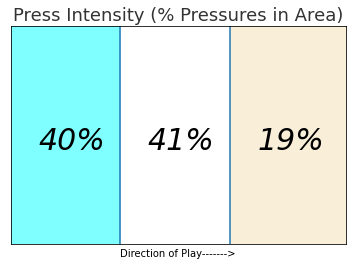

In [120]:
#### Press Intensity #####
'''Press intensity was calculated as % of pressure actions in different thirds in the excel document '''


plt.grid(False)
plt.axvline(x=40)
plt.axvline(x=80)
plt.axvspan(0, 40, alpha=0.5, color='cyan')
plt.axvspan(40, 80, alpha=0.5, color='white')
plt.axvspan(80,122, alpha=0.5, color='wheat')

plt.title("Press Intensity (% Pressures in Area)",fontsize=18,zorder=5,alpha=0.8)
plt.text(10,35, '40%', 
        style ='italic', 
        fontsize = 30)
plt.text(50,35, '41%', 
        style ='italic', 
        fontsize = 30)
plt.text(90,35, '19%', 
        style ='italic', 
        fontsize = 30)


plt.xlim(0,122)
plt.ylim(0,80)
plt.xticks([])
plt.yticks([])
plt.xlabel('Direction of Play------->')
plt.show()